# Underfitting vs Overfitting

Goals:
- hand-code the polynomial regression algorithm on toy dataset
- make the algorithm underfit, overfit and fit the data

## Import basic libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Create a toy dataset

In [2]:
import math

N = 100
D = 2

# data is normally distributed with mean data_mu and variance data_sigma
data_mu = .5
data_sigma = 1

# we believe that there is a "true" underlying dependency x2 = true_w1 * x1 + true_w2 * x1*x1 + true_b
# and if some x2 do not land on the line exactly, its due to an error
true_w1 = 4.5
true_w2 = -3.5
true_b = 2.5

# error is normally distributed random variable with mean err_mu and variance err_sigma
# that is, the error is sum of many different random influences
err_mu = 0
err_sigma = 1.5

# make up the dataset
data = np.empty([N, D], dtype=float)
data[:, 0] = data_sigma * np.random.randn(N) + data_mu
data[:, 1] = err_sigma * np.random.randn(N) + err_mu # errors
data[:, 1] = data[:, 0] * true_w1 + data[:, 0] * data[:, 0] * true_w2 + true_b + data[:, 1]

# peek into the dataset
data[:5]

array([[  0.65056826,   2.65812121],
       [ -1.58544216, -14.27746172],
       [  0.31461272,   2.54551242],
       [ -0.65248038,  -1.29021004],
       [ -0.5816289 ,  -0.30848259]])

## Plot the toy dataset

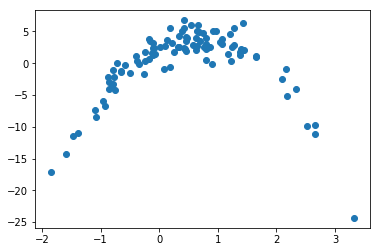

In [3]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## Model the relationship

In [4]:
# We are going to model the data using 3 different polynomials
# 1) x2 = w * x1 + b
# 2) x2 = w1 * x1 + w2 * x1*x1 + b
# 3) x2 = w1 * x1 + w2 * x1*x1 + w3 * x1*x1*x1 + b

# initial values for w and b
w1 = 1.0
w2 = 1.0
w3 = 2.5
b = 0.0

# predicts target values according to the models
def predict1(X):
    return X*w1 + b

def predict2(X):
    return X*w1 + X*X*w2 + b

def predict3(X):
    return X*w1 + X*X*w2 + X*X*X*w3 + b

### Untrained regression

In [5]:
x = np.linspace(-2.0, 3.0)
Y1 = predict1(x)
Y2 = predict2(x)
Y3 = predict3(x)

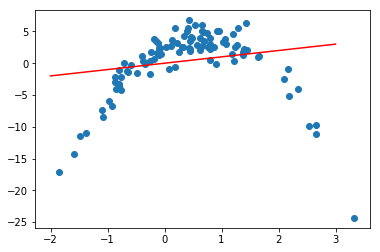

In [6]:
# first degree polynomial
plt.scatter(data[:, 0], data[:, 1])
plt.plot(x, Y1, color='red')

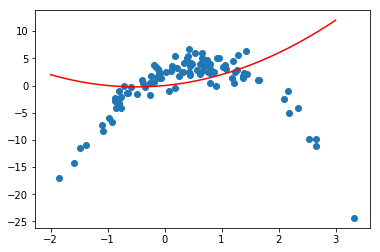

In [7]:
# second degree polynomial
plt.scatter(data[:, 0], data[:, 1])
plt.plot(x, Y2, color='red')

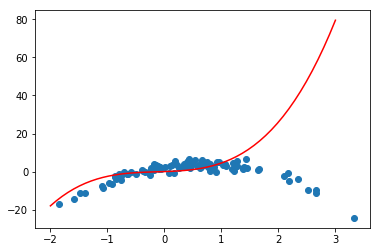

In [8]:
# third degree polynomial
plt.scatter(data[:, 0], data[:, 1])
plt.plot(x, Y3, color='red')

## Train the model

### Split into training set and validation set

In [9]:
X_train = data[:-10, 0]
T_train = data[:-10, 1]

X_test = data[-10:, 0]
T_test = data[-10:, 1]

### Plot the train and test data

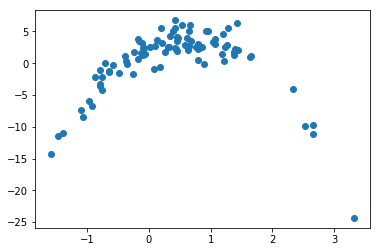

In [10]:
plt.scatter(X_train, T_train)

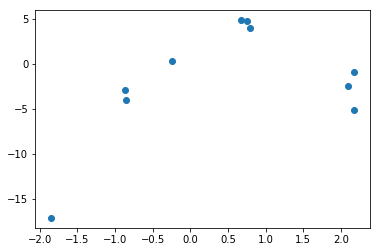

In [11]:
plt.scatter(X_test, T_test)

### Loss function

In [12]:
# Mean squared error
def mean_squared_error(T, Y):
    return np.square(Y - T).mean()

### Gradient descent - first degree polynomial

In [13]:
# initial parameters
w1 = 1.0
b = 0.0

# learning rate
alpha = 0.01

# error_delta
err_delta = 0.0001

# get starting error
Y_train = predict1(X_train)
err_prev = mean_squared_error(T_train, Y_train)

# counter
cnt = 0

while True:
    # print error every 10 steps
    if cnt % 100 == 0:
        print('error: ' + str(err_prev))
    cnt = cnt + 1
    
    # gradient descent
    grad_w = ((Y_train - T_train) * X_train).mean()
    grad_b = (Y_train - T_train).mean()
    w1 = w1 - alpha * grad_w
    b = b - alpha * grad_b
    
    # re-evaluate model
    Y_train = predict1(X_train)
    err = mean_squared_error(T_train, Y_train)

    # check if trained
    if abs(err - err_prev) < err_delta:
        break
    err_prev = err
    

print('final error: ' + str(err))
print('iterations: ' + str(cnt))

error: 26.32635688955945
error: 26.022104820485584
error: 25.960221596340322
final error: 25.94622801359292
iterations: 280


### Validate the model

In [14]:
Y_test = predict1(X_test)
validation_err = mean_squared_error(T_test, Y_test)
validation_err

40.03404801822016

### Plot the prediction line

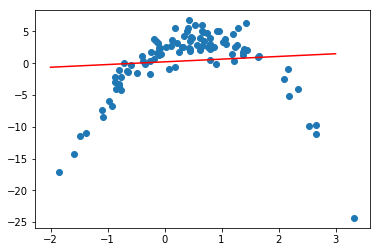

In [15]:
plt.scatter(data[:, 0], data[:, 1])

x = np.linspace(-2.0, 3.0)
plt.plot(x, predict1(x), color='red')

### Gradient descent - second degree polynomial

In [16]:
# initial parameters
w1 = 1.0
w2 = 1.0
b = 0.0

# learning rate
alpha = 0.01

# error_delta
err_delta = 0.0001

# get starting error
Y_train = predict2(X_train)
err_prev = mean_squared_error(T_train, Y_train)

# counter
cnt = 0

while True:
    # print error every 10 steps
    if cnt % 100 == 0:
        print('error: ' + str(err_prev))
    cnt = cnt + 1
    
    # gradient descent
    grad_w1 = ((Y_train - T_train) * X_train).mean()
    grad_w2 = ((Y_train - T_train) * X_train*X_train).mean()
    grad_b = (Y_train - T_train).mean()
    w1 = w1 - alpha * grad_w1
    w2 = w2 - alpha * grad_w2
    b = b - alpha * grad_b
    
    # re-evaluate model
    Y_train = predict2(X_train)
    err = mean_squared_error(T_train, Y_train)

    # check if trained
    if abs(err - err_prev) < err_delta:
        break
    err_prev = err
    

print('final error: ' + str(err))
print('iterations: ' + str(cnt))

error: 44.87704144342934
error: 8.778998487550197
error: 4.797860910081599
error: 3.3514660259430853
error: 2.8124206794099016
error: 2.6079571935311936
error: 2.529478287628085
error: 2.4991206606583525
final error: 2.490262874258341
iterations: 765


### Validate the model

In [17]:
Y_test = predict2(X_test)
validation_err = mean_squared_error(T_test, Y_test)
validation_err

1.9758967232915072

### Plot the prediction line

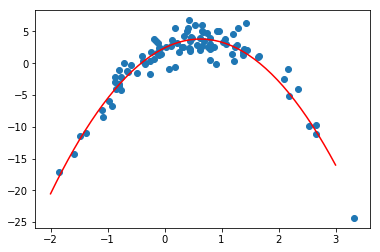

In [18]:
plt.scatter(data[:, 0], data[:, 1])

x = np.linspace(-2.0, 3.0)
plt.plot(x, predict2(x), color='red')

### Gradient descent - third degree polynomial

In [19]:
# initial parameters
w1 = 1.0
w2 = 1.0
w3 = 1.0
b = 0.0

# learning rate
alpha = 0.01

# error_delta
err_delta = 0.0001

# get starting error
Y_train = predict3(X_train)
err_prev = mean_squared_error(T_train, Y_train)

# counter
cnt = 0

while True:
    # print error every 10 steps
    if cnt % 100 == 0:
        print('error: ' + str(err_prev))
    cnt = cnt + 1
    
    # gradient descent
    grad_w1 = ((Y_train - T_train) * X_train).mean()
    grad_w2 = ((Y_train - T_train) * X_train*X_train).mean()
    grad_w3 = ((Y_train - T_train) * X_train*X_train*X_train).mean()
    grad_b = (Y_train - T_train).mean()
    w1 = w1 - alpha * grad_w1
    w2 = w2 - alpha * grad_w2
    w3 = w3 - alpha * grad_w3
    b = b - alpha * grad_b
    
    # re-evaluate model
    Y_train = predict3(X_train)
    err = mean_squared_error(T_train, Y_train)

    # check if trained
    if abs(err - err_prev) < err_delta:
        break
    err_prev = err
    

print('final error: ' + str(err))
print('iterations: ' + str(cnt))

error: 129.6479325102139
error: 8.781488579782588
error: 5.108508402907976
error: 3.5988195372302143
error: 2.964060371377526
error: 2.6888675972742226
error: 2.5648158272802646
error: 2.5062652895441713
error: 2.477227982698463
error: 2.4621132668504884
final error: 2.460550170975445
iterations: 915


### Validate the model

In [20]:
Y_test = predict3(X_test)
validation_err = mean_squared_error(T_test, Y_test)
validation_err

1.6309199051689105

### Plot the prediction line

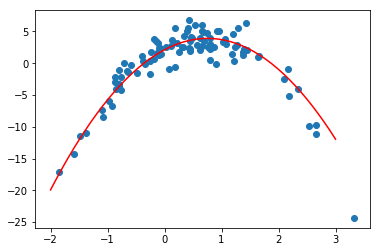

In [21]:
plt.scatter(data[:, 0], data[:, 1])

x = np.linspace(-2.0, 3.0)
plt.plot(x, predict2(x), color='red')

### Learned parameters

In [22]:
[w1, w2, w3, b]

[4.740207132998784,
 -3.143551043538857,
 -0.17105668814031144,
 2.1178870369713345]

## Conclusions

- First degree polynomial has high bias and high validation error, it is just a bad model for the dataset
- Second degree polynomial fits much better, showing low bias and low validation error, just as expected
- Third degree polynomial actually does not overfit, and behaves almost identical to the second degree polynomial model. Taking the closer look, we discover that in most cases it simply learns to keep w3 close to zero, basically converting itself to second degree polynomial. However, on average, it takes more iterations to train it comparing to training second degree polynomial directly